In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

def extract_urls_from_excel(file_path, sheet_name, column_name):
    try:
        # Read the Excel file
        df = pd.read_excel(file_path, sheet_name=sheet_name)

        # Extract URLs and corresponding url_id from the specified columns
        urls = df[column_name].tolist()
        url_ids = df['URL_ID'].tolist()  # Replace 'url_id' with the actual column name

        return urls, url_ids

    except Exception as e:
        print("Error:", e)
        return None, None

def scrape_article_text(url):
    try:
        # Send a GET request to the webpage
        response = requests.get(url)

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the article title
        article_title = soup.find('title').get_text()

        # Find the main article text
        article_text = ''
        article_body = soup.find('article')  # Adjust according to the structure of the HTML
        if article_body:
            paragraphs = article_body.find_all(['p', 'ul', 'ol'])  # Include lists along with paragraphs
            for element in paragraphs:
                if element.name == 'p' or element.name == 'li':  # Considering <li> as list items
                    article_text += element.get_text() + '\n'
                elif element.name == 'ul' or element.name == 'ol':
                    list_items = element.find_all('li')
                    for li in list_items:
                        article_text += '- ' + li.get_text() + '\n'

        # Return the extracted title and article text
        return article_title, article_text

    except Exception as e:
        print("Error:", e)
        return None, None

# Example usage
excel_file = '/content/Input.xlsx'
sheet_name = 'Sheet1'
url_column = 'URL'

urls, url_ids = extract_urls_from_excel(excel_file, sheet_name, url_column)
if urls and url_ids:
    for url, url_id in zip(urls, url_ids):
        title, text = scrape_article_text(url)
        if title and text:
            print("Article Title:", title)
            print("Article Text:", text)
            print("--------")

            # Save the extracted text to a text file
            file_name = f"/content/Extracted Data/{url_id}.txt"
            with open(file_name, 'w', encoding='utf-8') as file:
                file.write(f"Article Title: {title}\n")
                file.write(f"Article Text:\n{text}\n")

Article Title: Rising IT cities and its impact on the economy, environment, infrastructure, and city life by the year 2040. - Blackcoffer Insights
Article Text: - Entertainment
- Broadcasting
- Future
- Forecasts
- What We Think
- Futurist
We have seen a huge development and dependence of people on technology in recent years. We have also seen the development of AI and ChatGPT in recent years. So it is a normal thing that we will become fully dependent on technology by 2040. Information technology will be a major power for all the developing nations. As a member of a developing nation, India is rapidly growing its IT base. It has also grown some IT cities which will be the major control centres for Information technology by 2040.
Rising IT cities
- Noida:- Noida in Uttar Pradesh near New Delhi is an emerging IT sector now. Many large companies like Google, Microsoft, IBM, Infosys and others have set up their companies here. Noida has a market base of billions of dollars and is doing a 

In [ ]:
#Downloading the Exracted Data for further Analysis
!zip -r /content/sample_data/Extracted\ Data.zip /content/sample_data/Extracted\ Data/


  adding: content/sample_data/Extracted Data/ (stored 0%)
  adding: content/sample_data/Extracted Data/blackassign0072.txt (deflated 58%)
  adding: content/sample_data/Extracted Data/blackassign0083.txt (deflated 39%)
  adding: content/sample_data/Extracted Data/blackassign0060.txt (deflated 46%)
  adding: content/sample_data/Extracted Data/blackassign0032.txt (deflated 57%)
  adding: content/sample_data/Extracted Data/blackassign0089.txt (deflated 55%)
  adding: content/sample_data/Extracted Data/blackassign0033.txt (deflated 56%)
  adding: content/sample_data/Extracted Data/blackassign0086.txt (deflated 56%)
  adding: content/sample_data/Extracted Data/blackassign0095.txt (deflated 50%)
  adding: content/sample_data/Extracted Data/blackassign0046.txt (deflated 57%)
  adding: content/sample_data/Extracted Data/blackassign0057.txt (deflated 57%)
  adding: content/sample_data/Extracted Data/blackassign0039.txt (deflated 59%)
  adding: content/sample_data/Extracted Data/blackassign0068.t

In [ ]:
import os

stopwords_folder = '/content/Stop Words/'  # Replace with your folder path
stopwords = []

# Iterate through files in the StopWords folder
for filename in os.listdir(stopwords_folder):
    if filename.endswith('.txt'):  # Consider only text files
        file_path = os.path.join(stopwords_folder, filename)
        with open(file_path, 'r',encoding='latin-1') as file:
            stopwords.extend(file.read().splitlines())

# Convert the stop words list to a set to remove duplicates (if any)
stopwords = list(set(stopwords))

# Display the merged stop words list
print(stopwords)


['TAMIKA', 'BISH', 'LEANDRO', 'CLARKSON', 'CHRISMAN', 'SHAWANA', 'ORALEE', 'PEARLIE', 'FULK', 'REITZ', 'RAYMUNDO', 'OBDULIA', 'lest', 'changes', 'DARELL', 'NGUYET', 'seeing', 'MINNICK', 'JA', 'CREEKMORE', 'MATHES', 'HARMON', 'HUTCHISON', 'JOHNATHON', 'MCFARLAND', 'MAYER', 'CÓRDOBA  | Nicaragua ', 'ASHELY', 'TANKERSLEY', 'SORRELL', 'only', 'MIZE', 'MAYRA', 'KELLY', 'EBONY', 'NALLEY', 'ETHAN', 'YASMINE', 'JETER', 'ROYCE', 'ELLIS', 'HANNAH', 'HENRIETTA', 'JUANITA', 'SARAH', 'ETHEL', 'CORRIGAN', 'BRUMMETT', 'somebody', 'MICKENS', 'LITTRELL', 'NATOSHA', 'KLINK', 'BANNER', 'CIERA', 'CLARK', 'JEWEL', 'STAFFORD', 'GADDIS', 'REICH', 'OKELLEY', 'ASHLY', 'CAYLA', 'EMERY', 'ELIZBETH', 'TIMBERLAKE', 'LOOMIS', 'FUCHS', 'HUSKEY', 'FLORENTINA', 'QUARTER', 'MATTA', 'MIRANDA', 'WIGHT', 'CITY', 'NAVE', 'CHALMERS', 'CHITWOOD', 'WEATHERFORD', 'BANCROFT', 'little', 'MALORIE', 'would', 'IVIE', 'regardless', 'KAVANAUGH', 'seriously', 'HARVEY', 'RING', 'CELESTINA', 'HERREN', 'LATICIA', 'WOODFORD', 'DEIRDRE', '

In [ ]:
import os


# Function to remove stop words from text
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Directory where the files are located
directory = '/content/Extracted Data/'



# Iterate through files in the directory
for i in range(1, 101):
    file_name = f'{directory}blackassign{i:04d}.txt'

    # Read text from file
    try:
        with open(file_name, 'r', encoding='utf-8') as file:
            text = file.read()
    except FileNotFoundError:
        print(f"File {file_name} not found.")
        continue

    # Remove stopwords
    filtered_text = remove_stopwords(text, stopwords)

    # Write updated text back to file
    try:
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(filtered_text)
        print(f"Stopwords removed from {file_name}")
    except Exception as e:
        print(f"Error occurred while writing to {file_name}: {e}")



Stopwords removed from /content/Extracted Data/blackassign0001.txt
Stopwords removed from /content/Extracted Data/blackassign0002.txt
Stopwords removed from /content/Extracted Data/blackassign0003.txt
Stopwords removed from /content/Extracted Data/blackassign0004.txt
Stopwords removed from /content/Extracted Data/blackassign0005.txt
Stopwords removed from /content/Extracted Data/blackassign0006.txt
Stopwords removed from /content/Extracted Data/blackassign0007.txt
Stopwords removed from /content/Extracted Data/blackassign0008.txt
Stopwords removed from /content/Extracted Data/blackassign0009.txt
Stopwords removed from /content/Extracted Data/blackassign0010.txt
Stopwords removed from /content/Extracted Data/blackassign0011.txt
Stopwords removed from /content/Extracted Data/blackassign0012.txt
Stopwords removed from /content/Extracted Data/blackassign0013.txt
Stopwords removed from /content/Extracted Data/blackassign0014.txt
Stopwords removed from /content/Extracted Data/blackassign0015

In [ ]:
import os

# Function to load words from a file
def load_words(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        words = file.read().splitlines()
    return set(words)

# Directory where the files are located
directory = '/content/Extracted Data/'

# Positive and negative words file paths
positive_words_file_path = '/content/Master_Dictionary/positive-words.txt'
negative_words_file_path = '/content/Master_Dictionary/negative-words.txt'

# Load positive and negative words
positive_words_set = load_words(positive_words_file_path)
negative_words_set = load_words(negative_words_file_path)

# Dictionaries to store count of positive and negative words for each file
positive_word_counts = {}
negative_word_counts = {}

# Iterate through files in the directory
for i in range(1, 101):
    file_name = f'{directory}blackassign{i:04d}.txt'

    # Read text from file
    try:
        with open(file_name, 'r', encoding='utf-8') as file:
            text = file.read()
    except FileNotFoundError:
        print(f"File {file_name} not found.")
        continue

    # Split text into words
    words = text.split()

    # Count positive and negative words present in the extracted text
    positive_count = len(set(words) & positive_words_set)
    negative_count = len(set(words) & negative_words_set)

    # Store positive and negative word counts in the dictionaries
    positive_word_counts[file_name] = positive_count
    negative_word_counts[file_name] = negative_count

# Display or do something with the positive and negative word counts
for file, count in positive_word_counts.items():
    print(f"Positive words count in {file}: {count}")

print("-------------------------------------------------------------------------------------------")

for file, count in negative_word_counts.items():
    print(f"Negative words count in {file}: {count}")


File /content/Extracted Data/blackassign0036.txt not found.
File /content/Extracted Data/blackassign0049.txt not found.
Positive words count in /content/Extracted Data/blackassign0001.txt: 17
Positive words count in /content/Extracted Data/blackassign0002.txt: 36
Positive words count in /content/Extracted Data/blackassign0003.txt: 25
Positive words count in /content/Extracted Data/blackassign0004.txt: 24
Positive words count in /content/Extracted Data/blackassign0005.txt: 16
Positive words count in /content/Extracted Data/blackassign0006.txt: 55
Positive words count in /content/Extracted Data/blackassign0007.txt: 25
Positive words count in /content/Extracted Data/blackassign0008.txt: 22
Positive words count in /content/Extracted Data/blackassign0009.txt: 21
Positive words count in /content/Extracted Data/blackassign0010.txt: 36
Positive words count in /content/Extracted Data/blackassign0011.txt: 41
Positive words count in /content/Extracted Data/blackassign0012.txt: 29
Positive words c

In [ ]:
# Calculate polarity score for each file
polarity_scores = {}

for file in positive_word_counts:
    positive_count = positive_word_counts[file]

    # Fetch negative count for the file
    negative_count = negative_word_counts.get(file, 0)

    # Calculate polarity score
    polarity_score = (positive_count - negative_count) / ((positive_count + negative_count) + 0.000001)
    polarity_scores[file] = polarity_score

# Display or do something with the polarity scores
for file, score in polarity_scores.items():
    print(f"Polarity score for {file}: {score}")


Polarity score for /content/Extracted Data/blackassign0001.txt: 0.5454545206611581
Polarity score for /content/Extracted Data/blackassign0002.txt: 0.33333332716049396
Polarity score for /content/Extracted Data/blackassign0003.txt: 0.35135134185536915
Polarity score for /content/Extracted Data/blackassign0004.txt: -0.3684210477839336
Polarity score for /content/Extracted Data/blackassign0005.txt: 0.39130433081285515
Polarity score for /content/Extracted Data/blackassign0006.txt: 0.4864864799123449
Polarity score for /content/Extracted Data/blackassign0007.txt: -0.15254237029589204
Polarity score for /content/Extracted Data/blackassign0008.txt: 0.5714285510204089
Polarity score for /content/Extracted Data/blackassign0009.txt: -0.15999999680000007
Polarity score for /content/Extracted Data/blackassign0010.txt: -0.1999999977777778
Polarity score for /content/Extracted Data/blackassign0011.txt: 0.5769230658284026
Polarity score for /content/Extracted Data/blackassign0012.txt: 0.318181810950

In [ ]:
import os
import re

# Function to count words in a file
def count_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        return len(words)

# Function to count sentences in a file
def count_sentences(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        sentences = re.split(r'[.!?]+', text)  # Split by '.', '!', or '?' to count sentences
        return len(sentences)

# Directory where the updated files are located
updated_directory = '/content/Extracted Data/'

# Dictionaries to store word count and sentence count for each updated file
word_counts = {}
sentence_counts = {}

# Iterate through updated files in the directory
for i in range(1, 101):
    updated_file_name = f'{updated_directory}blackassign{i:04d}.txt'

    # Count words and sentences in the file
    try:
        word_count = count_words(updated_file_name)
        sentence_count = count_sentences(updated_file_name)

        word_counts[updated_file_name] = word_count
        sentence_counts[updated_file_name] = sentence_count

        print(f"Word count for {updated_file_name}: {word_count}")
        print(f"Sentence count for {updated_file_name}: {sentence_count}")
    except FileNotFoundError:
        print(f"File {updated_file_name} not found.")
        continue




Word count for /content/Extracted Data/blackassign0001.txt: 608
Sentence count for /content/Extracted Data/blackassign0001.txt: 80
Word count for /content/Extracted Data/blackassign0002.txt: 839
Sentence count for /content/Extracted Data/blackassign0002.txt: 82
Word count for /content/Extracted Data/blackassign0003.txt: 657
Sentence count for /content/Extracted Data/blackassign0003.txt: 57
Word count for /content/Extracted Data/blackassign0004.txt: 626
Sentence count for /content/Extracted Data/blackassign0004.txt: 52
Word count for /content/Extracted Data/blackassign0005.txt: 386
Sentence count for /content/Extracted Data/blackassign0005.txt: 41
Word count for /content/Extracted Data/blackassign0006.txt: 1145
Sentence count for /content/Extracted Data/blackassign0006.txt: 92
Word count for /content/Extracted Data/blackassign0007.txt: 761
Sentence count for /content/Extracted Data/blackassign0007.txt: 76
Word count for /content/Extracted Data/blackassign0008.txt: 523
Sentence count for

In [ ]:
# Dictionary to store subjectivity scores for each file
subjectivity_scores = {}

# Iterate through the word counts dictionary to calculate subjectivity scores
for file, word_count in word_counts.items():
    positive_count = positive_word_counts.get(file, 0)
    negative_count = negative_word_counts.get(file, 0)

    # Calculate subjectivity score
    subjectivity_score = (positive_count + negative_count) / (word_count + 0.000001)
    subjectivity_scores[file] = subjectivity_score

# Display or do something with the subjectivity scores
for file, score in subjectivity_scores.items():
    print(f"Subjectivity score for {file}: {score}")


Subjectivity score for /content/Extracted Data/blackassign0001.txt: 0.036184210466802286
Subjectivity score for /content/Extracted Data/blackassign0002.txt: 0.06436233603770877
Subjectivity score for /content/Extracted Data/blackassign0003.txt: 0.056316590477448115
Subjectivity score for /content/Extracted Data/blackassign0004.txt: 0.12140575060478315
Subjectivity score for /content/Extracted Data/blackassign0005.txt: 0.05958549207361272
Subjectivity score for /content/Extracted Data/blackassign0006.txt: 0.0646288209042543
Subjectivity score for /content/Extracted Data/blackassign0007.txt: 0.07752956625817403
Subjectivity score for /content/Extracted Data/blackassign0008.txt: 0.05353728479247173
Subjectivity score for /content/Extracted Data/blackassign0009.txt: 0.07836990583327601
Subjectivity score for /content/Extracted Data/blackassign0010.txt: 0.048076923051240956
Subjectivity score for /content/Extracted Data/blackassign0011.txt: 0.058890147158674806
Subjectivity score for /conte

**Readability Analysis**

In [ ]:
# Dictionary to store average sentence length for each file
avg_sentence_lengths = {}

# Iterate through the word counts and sentence counts dictionaries to calculate average sentence length
for file, word_count in word_counts.items():
    sentence_count = sentence_counts.get(file, 0)

    # Calculate average sentence length
    if sentence_count != 0:  # Avoid division by zero
        avg_sentence_length = word_count / sentence_count
    else:
        avg_sentence_length = 0

    avg_sentence_lengths[file] = avg_sentence_length

# Display or do something with the average sentence lengths
for file, length in avg_sentence_lengths.items():
    print(f"Average sentence length for {file}: {length}")


Average sentence length for /content/Extracted Data/blackassign0001.txt: 7.6
Average sentence length for /content/Extracted Data/blackassign0002.txt: 10.231707317073171
Average sentence length for /content/Extracted Data/blackassign0003.txt: 11.526315789473685
Average sentence length for /content/Extracted Data/blackassign0004.txt: 12.038461538461538
Average sentence length for /content/Extracted Data/blackassign0005.txt: 9.414634146341463
Average sentence length for /content/Extracted Data/blackassign0006.txt: 12.445652173913043
Average sentence length for /content/Extracted Data/blackassign0007.txt: 10.013157894736842
Average sentence length for /content/Extracted Data/blackassign0008.txt: 10.673469387755102
Average sentence length for /content/Extracted Data/blackassign0009.txt: 11.0
Average sentence length for /content/Extracted Data/blackassign0010.txt: 7.767634854771784
Average sentence length for /content/Extracted Data/blackassign0011.txt: 12.985294117647058
Average sentence le

In [ ]:
import os
import nltk
from nltk.tokenize import SyllableTokenizer

# Download NLTK resources (only if you haven't already)
nltk.download('punkt')

# Function to count syllables in a word
def count_syllables(word):
    syllable_count = SyllableTokenizer().tokenize(word)
    return len(syllable_count)

# Function to count complex words in the text
def count_complex_words(text):
    words = text.split()
    complex_words = [word for word in words if count_syllables(word) > 2]
    return len(complex_words)

# Directory where the files are located
directory = '/content/Extracted Data/'

# Dictionary to store complex word counts and percentages for each file
complex_word_counts = {}
complex_word_percentages = {}

# Iterate through the files in the directory to count complex words and calculate percentages
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                word_count = len(text.split())
                complex_word_count = count_complex_words(text)
                complex_word_counts[filename] = complex_word_count
                complex_word_percentages[filename] = (complex_word_count / word_count) * 100 if word_count > 0 else 0
        except FileNotFoundError:
            print(f"File {filename} not found.")
        except Exception as e:
            print(f"Error occurred while processing {filename}: {e}")

# Sort the complex word counts dictionary based on file names
sorted_complex_word_counts = dict(sorted(complex_word_counts.items()))
sorted_complex_word_percentages = dict(sorted(complex_word_percentages.items()))

# Display or use the sorted complex word counts and percentages as needed
for filename, count in sorted_complex_word_counts.items():
    print(f"Complex word count for {filename}: {count}")

for filename, percentage in sorted_complex_word_percentages.items():
    print(f"Percentage of complex words for {filename}: {percentage}%")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '“'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '”'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '’'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '–'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '‘'
  warn

Complex word count for blackassign0001.txt: 187
Complex word count for blackassign0002.txt: 389
Complex word count for blackassign0003.txt: 382
Complex word count for blackassign0004.txt: 350
Complex word count for blackassign0005.txt: 171
Complex word count for blackassign0006.txt: 591
Complex word count for blackassign0007.txt: 328
Complex word count for blackassign0008.txt: 298
Complex word count for blackassign0009.txt: 360
Complex word count for blackassign0010.txt: 989
Complex word count for blackassign0011.txt: 443
Complex word count for blackassign0012.txt: 495
Complex word count for blackassign0013.txt: 195
Complex word count for blackassign0014.txt: 272
Complex word count for blackassign0015.txt: 331
Complex word count for blackassign0016.txt: 331
Complex word count for blackassign0017.txt: 309
Complex word count for blackassign0018.txt: 326
Complex word count for blackassign0019.txt: 460
Complex word count for blackassign0020.txt: 102
Complex word count for blackassign0021.t

In [ ]:
# Dictionary to store average words per sentence for each file
avg_words_per_sentence = {}

# Calculate average words per sentence for each file
for file in word_counts:
    word_count = word_counts[file]
    sentence_count = sentence_counts.get(file, 0)

    # Calculate average words per sentence
    if sentence_count != 0:  # Avoid division by zero
        avg_words_per_sentence[file] = word_count / sentence_count
    else:
        avg_words_per_sentence[file] = 0

# Display or use the average words per sentence for each file
for file, avg_words in avg_words_per_sentence.items():
    print(f"Average words per sentence for {file}: {avg_words}")


Average words per sentence for /content/Extracted Data/blackassign0001.txt: 7.6
Average words per sentence for /content/Extracted Data/blackassign0002.txt: 10.231707317073171
Average words per sentence for /content/Extracted Data/blackassign0003.txt: 11.526315789473685
Average words per sentence for /content/Extracted Data/blackassign0004.txt: 12.038461538461538
Average words per sentence for /content/Extracted Data/blackassign0005.txt: 9.414634146341463
Average words per sentence for /content/Extracted Data/blackassign0006.txt: 12.445652173913043
Average words per sentence for /content/Extracted Data/blackassign0007.txt: 10.013157894736842
Average words per sentence for /content/Extracted Data/blackassign0008.txt: 10.673469387755102
Average words per sentence for /content/Extracted Data/blackassign0009.txt: 11.0
Average words per sentence for /content/Extracted Data/blackassign0010.txt: 7.767634854771784
Average words per sentence for /content/Extracted Data/blackassign0011.txt: 12.98

In [ ]:
# Dictionary to store average characters per word for each file
avg_chars_per_word = {}

# Iterate through the files to calculate average characters per word
for file in word_counts:
    file_path = f'{file}'

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            words = text.split()
            total_chars = sum(len(word) for word in words)
            total_words = len(words)

            # Calculate average characters per word
            avg_chars_per_word[file] = total_chars / total_words if total_words > 0 else 0
    except FileNotFoundError:
        print(f"File {file_path} not found.")
    except Exception as e:
        print(f"Error occurred while processing {file}: {e}")

# Display or use the average characters per word for each file
for file, avg_chars in avg_chars_per_word.items():
    print(f"Average characters per word: {avg_chars}")


Average characters per word: 6.559210526315789
Average characters per word: 7.593563766388558
Average characters per word: 8.39421613394216
Average characters per word: 8.271565495207668
Average characters per word: 7.66580310880829
Average characters per word: 8.036681222707424
Average characters per word: 7.148488830486202
Average characters per word: 8.223709369024856
Average characters per word: 8.094043887147336
Average characters per word: 7.810897435897436
Average characters per word: 7.822197055492639
Average characters per word: 7.866666666666666
Average characters per word: 7.834375
Average characters per word: 7.423931623931624
Average characters per word: 7.499278499278499
Average characters per word: 7.499278499278499
Average characters per word: 7.414285714285715
Average characters per word: 7.651612903225806
Average characters per word: 7.596739130434782
Average characters per word: 7.319672131147541
Average characters per word: 7.576271186440678
Average characters per w

In [ ]:
import os
import re
import nltk
from nltk.tokenize import SyllableTokenizer

# Download NLTK resources (only if you haven't already)
nltk.download('punkt')

# Function to load words from a file
def load_words(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        words = file.read().splitlines()
    return set(words)

# Function to count words in a file
def count_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        return len(words)

# Function to count sentences in a file
def count_sentences(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        sentences = re.split(r'[.!?]+', text)  # Split by '.', '!', or '?' to count sentences
        return len(sentences)

# Function to count syllables in a word
def count_syllables(word):
    syllable_count = SyllableTokenizer().tokenize(word)
    return len(syllable_count)

# Function to count complex words in the text
def count_complex_words(text):
    words = text.split()
    complex_words = [word for word in words if count_syllables(word) > 2]
    return len(complex_words)

# Directory where the files are located
directory = '/content/Extracted Data/'

# Positive and negative words file paths
positive_words_file_path = '/content/Master_Dictionary/positive-words.txt'
negative_words_file_path = '/content/Master_Dictionary/negative-words.txt'

# Load positive and negative words
positive_words_set = load_words(positive_words_file_path)
negative_words_set = load_words(negative_words_file_path)

# Dictionaries to store count of positive and negative words for each file
positive_word_counts = {}
negative_word_counts = {}

# Dictionaries to store word count and sentence count for each file
word_counts = {}
sentence_counts = {}

# Dictionaries to store complex word counts and percentages for each file
complex_word_counts = {}
complex_word_percentages = {}

# Iterate through files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                # Count words and sentences
                word_counts[filename] = count_words(file_path)
                sentence_counts[filename] = count_sentences(file_path)

                # Calculate complex word count and percentage
                word_count = word_counts[filename]
                complex_word_count = count_complex_words(text)
                complex_word_counts[filename] = complex_word_count
                complex_word_percentages[filename] = (complex_word_count / word_count) * 100 if word_count > 0 else 0

                # Count positive and negative words present in the text
                positive_count = len(set(text.split()) & positive_words_set)
                negative_count = len(set(text.split()) & negative_words_set)
                positive_word_counts[filename] = positive_count
                negative_word_counts[filename] = negative_count

        except FileNotFoundError:
            print(f"File {filename} not found.")
        except Exception as e:
            print(f"Error occurred while processing {filename}: {e}")

# Calculate polarity scores
polarity_scores = {}
for file in positive_word_counts:
    positive_count = positive_word_counts[file]
    negative_count = negative_word_counts.get(file, 0)
    polarity_score = (positive_count - negative_count) / ((positive_count + negative_count) + 0.000001)
    polarity_scores[file] = polarity_score

# Calculate subjectivity scores
subjectivity_scores = {}
for file, word_count in word_counts.items():
    positive_count = positive_word_counts.get(file, 0)
    negative_count = negative_word_counts.get(file, 0)
    subjectivity_score = (positive_count + negative_count) / (word_count + 0.000001)
    subjectivity_scores[file] = subjectivity_score

# Calculate average words per sentence
avg_words_per_sentence = {}
for file in word_counts:
    word_count = word_counts[file]
    sentence_count = sentence_counts.get(file, 0)
    avg_words_per_sentence[file] = word_count / sentence_count if sentence_count != 0 else 0

# Calculate average characters per word
avg_chars_per_word = {}
for file in word_counts:
    file_path = os.path.join(directory, file)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            words = text.split()
            total_chars = sum(len(word) for word in words)
            total_words = len(words)
            avg_chars_per_word[file] = total_chars / total_words if total_words > 0 else 0
    except FileNotFoundError:
        print(f"File {file_path} not found.")
    except Exception as e:
        print(f"Error occurred while processing {file}: {e}")



# Calculate average words per sentence
avg_words_per_sentence = {}
for file in word_counts:
    word_count = word_counts[file]
    sentence_count = sentence_counts.get(file, 0)
    avg_words_per_sentence[file] = word_count / sentence_count if sentence_count != 0 else 0

# Display or use the results as needed
# Example: Printing results
for file, score in polarity_scores.items():
    print(f"Polarity score for {file}: {score}")

for file, score in subjectivity_scores.items():
    print(f"Subjectivity score for {file}: {score}")

for file, avg_words in avg_words_per_sentence.items():
    print(f"Average words per sentence for {file}: {avg_words}")

for file, avg_chars in avg_chars_per_word.items():
    print(f"Average characters per word for {file}: {avg_chars}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '’'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '“'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '”'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '–'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '—'
 

Polarity score for blackassign0010.txt: -0.1999999977777778
Polarity score for blackassign0034.txt: 0.22222221604938291
Polarity score for blackassign0093.txt: 0.199999960000008
Polarity score for blackassign0053.txt: 0.9230768875739658
Polarity score for blackassign0045.txt: 0.28767122893601055
Polarity score for blackassign0028.txt: -0.025641024983563465
Polarity score for blackassign0002.txt: 0.33333332716049396
Polarity score for blackassign0054.txt: 0.49999987500003124
Polarity score for blackassign0059.txt: 0.0
Polarity score for blackassign0092.txt: -0.25581394753921055
Polarity score for blackassign0038.txt: 0.23809523431594867
Polarity score for blackassign0037.txt: 0.3999999866666671
Polarity score for blackassign0013.txt: 0.3103448168846615
Polarity score for blackassign0017.txt: 0.4857142718367351
Polarity score for blackassign0005.txt: 0.39130433081285515
Polarity score for blackassign0064.txt: -0.2499999947916668
Polarity score for blackassign0067.txt: 0.7647058373702448


In [ ]:
import os
import pandas as pd

# Save DataFrame to Excel
excel_output_path = '/content/analysis_results.xlsx'

# Assuming 'word_counts' as the reference dictionary for keys
keys = list(word_counts.keys())

# Creating a list of dictionaries
data_list = []

for key in keys:
    file_path = os.path.join(directory, key)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            words = text.split()
            total_chars = sum(len(word) for word in words)
            total_words = len(words)
            avg_chars_per_word = total_chars / total_words if total_words > 0 else 0

            data_list.append({
                'File': key,
                'Word_Count': word_counts.get(key, 0),
                'Sentence_Count': sentence_counts.get(key, 0),
                'Complex_Word_Count': complex_word_counts.get(key, 0),
                'Complex_Word_Percentage': complex_word_percentages.get(key, 0),
                'Positive_Word_Count': positive_word_counts.get(key, 0),
                'Negative_Word_Count': negative_word_counts.get(key, 0),
                'Polarity_Score': polarity_scores.get(key, 0),
                'Subjectivity_Score': subjectivity_scores.get(key, 0),
                'Avg_Words_Per_Sentence': avg_words_per_sentence.get(key, 0),
                'Avg_Chars_Per_Word': avg_chars_per_word
            })
    except FileNotFoundError:
        print(f"File {file_path} not found.")
    except Exception as e:
        print(f"Error occurred while processing {file}: {e}")

# Creating DataFrame
df1 = pd.DataFrame(data_list)

sorted_df = df1.sort_values(by='File')

# Save DataFrame to Excel
sorted_df.to_excel(excel_output_path, index=False)

sorted_df


,File,Word_Count,Sentence_Count,Complex_Word_Count,Complex_Word_Percentage,Positive_Word_Count,Negative_Word_Count,Polarity_Score,Subjectivity_Score,Avg_Words_Per_Sentence,Avg_Chars_Per_Word
92,blackassign0001.txt,608,80,187,30.756579,17,5,0.545455,0.036184,7.600000,6.559211
6,blackassign0002.txt,839,82,389,46.364720,36,18,0.333333,0.064362,10.231707,7.593564
72,blackassign0003.txt,657,57,382,58.143075,25,12,0.351351,0.056317,11.526316,8.394216
26,blackassign0004.txt,626,52,350,55.910543,24,52,-0.368421,0.121406,12.038462,8.271565
14,blackassign0005.txt,386,41,171,44.300518,16,7,0.391304,0.059585,9.414634,7.665803
...,...,...,...,...,...,...,...,...,...,...,...
38,blackassign0096.txt,596,52,283,47.483221,19,34,-0.283019,0.088926,11.461538,7.407718
74,blackassign0097.txt,471,40,192,40.764331,14,25,-0.282051,0.082803,11.775000,6.842887
68,blackassign0098.txt,285,25,102,35.789474,4,2,0.333333,0.021053,11.400000,6.575439
91,blackassign0099.txt,326,37,95,29.141104,11,2,0.692308,0.039877,8.810811,6.325153


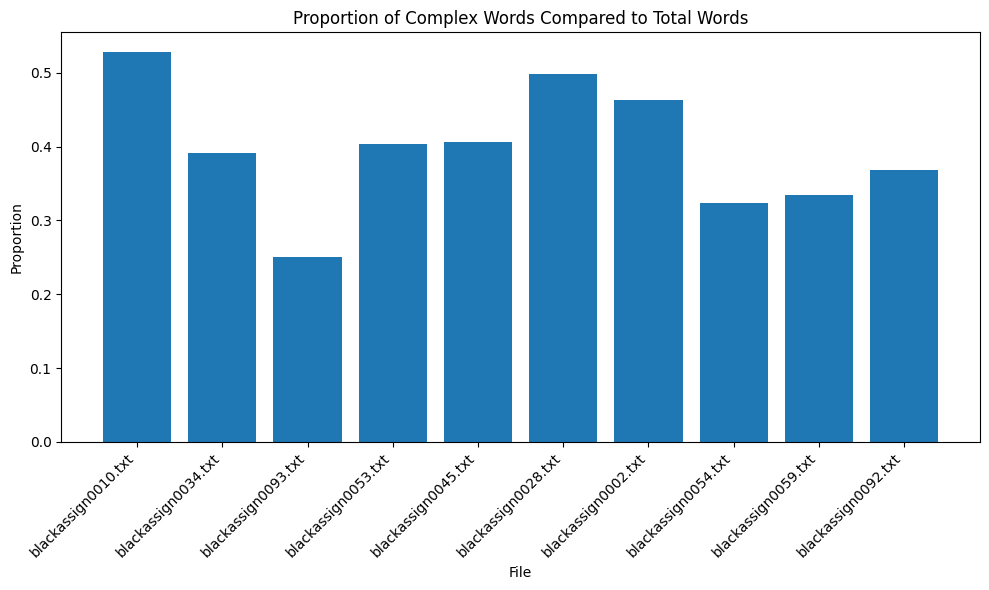

In [ ]:
import matplotlib.pyplot as plt

# Select the first 10 rows from the DataFrame
df_first_10 = df1.head(10)

# Calculate proportion of complex words compared to total words for each file
proportions = df_first_10['Complex_Word_Count'] / df_first_10['Word_Count']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_first_10['File'], proportions)
plt.title('Proportion of Complex Words Compared to Total Words')
plt.xlabel('File')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


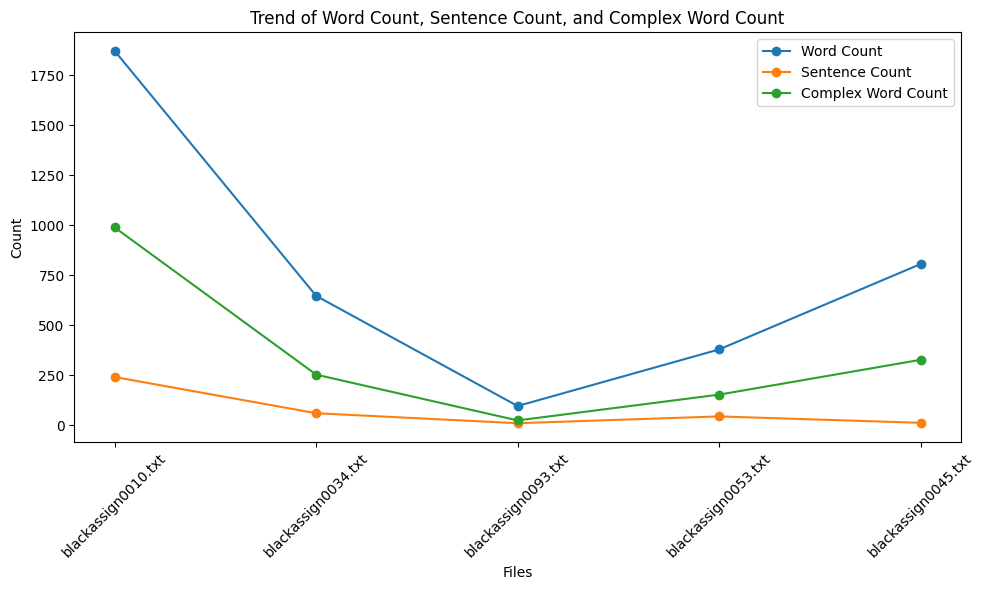

In [ ]:
import matplotlib.pyplot as plt

# Extract data for the first five files
file_keys = list(word_counts.keys())[:5]
word_counts_list = [word_counts[key] for key in file_keys]
sentence_counts_list = [sentence_counts.get(key, 0) for key in file_keys]
complex_word_counts_list = [complex_word_counts.get(key, 0) for key in file_keys]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(file_keys, word_counts_list, label='Word Count', marker='o')
plt.plot(file_keys, sentence_counts_list, label='Sentence Count', marker='o')
plt.plot(file_keys, complex_word_counts_list, label='Complex Word Count', marker='o')

plt.title('Trend of Word Count, Sentence Count, and Complex Word Count')
plt.xlabel('Files')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


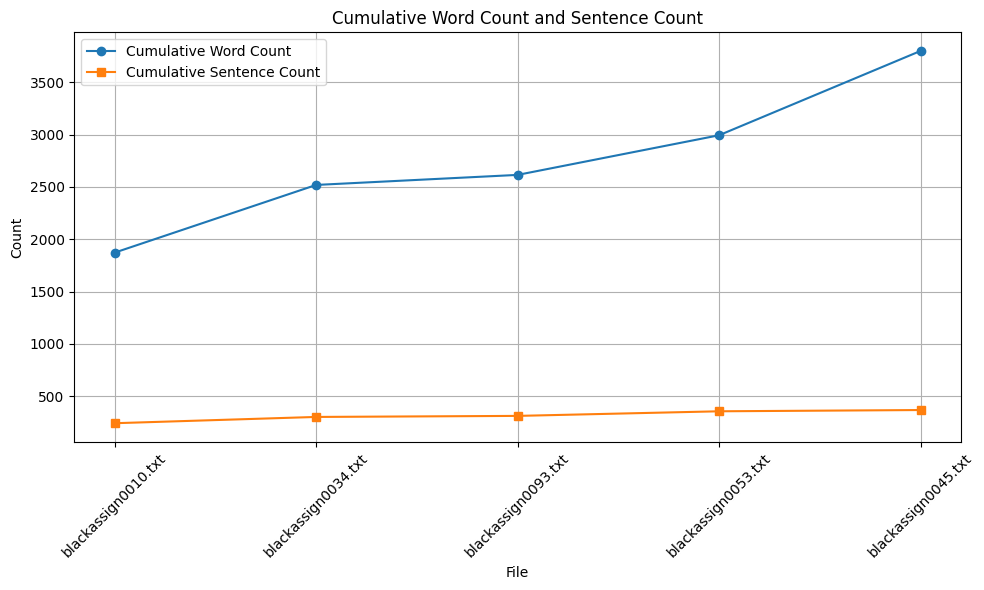

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'word_counts' and 'sentence_counts' are dictionaries containing word count and sentence count for each file
files = list(word_counts.keys())[:5]  # Selecting the first 5 files

# Calculate cumulative word count and sentence count
cumulative_word_count = [sum(word_counts[file] for file in files[:i+1]) for i in range(len(files))]
cumulative_sentence_count = [sum(sentence_counts[file] for file in files[:i+1]) for i in range(len(files))]

# Create DataFrame
df_cumulative_counts = pd.DataFrame({'File': files,
                                     'Cumulative_Word_Count': cumulative_word_count,
                                     'Cumulative_Sentence_Count': cumulative_sentence_count})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_cumulative_counts['File'], df_cumulative_counts['Cumulative_Word_Count'], marker='o', label='Cumulative Word Count')
plt.plot(df_cumulative_counts['File'], df_cumulative_counts['Cumulative_Sentence_Count'], marker='s', label='Cumulative Sentence Count')
plt.xlabel('File')
plt.ylabel('Count')
plt.title('Cumulative Word Count and Sentence Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
